<a href="https://colab.research.google.com/github/inteligenciafrvm/inteligenciafrvm/blob/master/Clases%20pr%C3%A1cticas/10.%20Intro%20al%20aprendizaje%20por%20refuerzos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción al Aprendizaje por Refuerzos

* Introducción
* Librería OpenAI Gym
* Evaluación del rendimiento en un algoritmo de RL
* Híper-parámetros en RL

5to año - Ingeniería en Sistemas de Información

Facultad Regional Villa María

## Introducción

RL, informalmente y a fines prácticos, es una forma de aprendizaje que guía la búsqueda (con parte estocástica) de las acciones para que las mismas tiendan a converger en aquellas que maximicen la recompensa recibida.

En la presente clase vamos a introducir algunas de las herramientas disponibles para trabajar con aprendizaje por refuerzos (RL). A nivel de implementación, a diferencia de lo que sucede con el aprendizaje supervisado y no supervisado, RL resulta más complejo porque su implementación depende mucho del dominio del problema.

Esto se debe a que en RL **no realizamos el aprendizaje a partir de datasets fijos sino por medio de la interacción con el entorno, el cual puede ser real o simulado**. Los datos en RL los obtenemos a partir de las trazas de ejecución

$$T_0 = (s_{00}, a_{00}, r_{01}, s_{01}, a_{01}, \dots, r_{0t}, s_{0t})$$
$$T_1 = (s_{10}, a_{10}, r_{11}, s_{11}, a_{11}, \dots, r_{1r}, s_{1r})$$
$$\dots$$
$$T_N = (\dots)$$



En un problema de RL dado, el entorno puede ser real (en donde las acciones impactan directamente en un sistema real, por ejemplo un robot) o bien simulado (en donde el entorno está bajo el control de quién simula, por ejemplo con un motor de física usado para simular los movimientos en el robot).

Para entornos simulados, existen una serie de librerías tanto de entornos como de agentes que nos permiten empezar a entrenar nuestros algoritmos de arranque.

### Repaso rápido

* Recompensa: señal $r$ recibida desde el entorno que recompensa o castiga el agente según su desempeño con respecto al objetivo de la tarea.

* Valor: función $v_\pi (s)$ que establece cuánto el agente espera percibir de recompensa al seguir la política $\pi$ partiendo desde el estado $s$. También se la suele expresar como $Q_\pi(s,a)$, indicando cuánto el agente espera percibir siguiendo la política $\pi$ partiendo desde el estado $s$ y siguiendo la acción $a$.

* Política: función $\pi(s) \to a$ que mapea un estado a una acción. Se suele expresar como probabilidad de elegir la acción $\pi(a \mid s)$. La política $\epsilon$-greedy, en donde $\epsilon$ es la probabilidad de exploración (normalmente menor que la probabilidad de explotación) está dada por
$$\pi(a \mid s) = 1 - \epsilon$$ si $a$ es la mejor acción, caso contrario $$\pi(a \mid s) = \epsilon$$

Por otra parte, en la política Softmax, no se busca la acción con máxima probabilidad sino que se computa la probabilidad de cada una mediante la función Softmax y se realiza un sorteo entre ellas pesado por la misma. Así, para cada acción $a$, $$\pi(a \mid s) = \frac{e^{Q(s,a)/\tau}}{\sum_{a'}e^{Q(s,a')/\tau}}$$

En este notebook vemos dos algoritmos para actualizar la función de valor (y, por lo tanto, la política de selección de acciones):

* Actualización por SARSA (on-policy).

$$Q(s,a) \gets Q(s,a) + \alpha (r + \gamma Q(s',a') - Q(s,a))$$

Algoritmo completo (a modo de referencia):

![Algoritmo SARSA](images/10/sarsa.png)


* Actualización por Q-Learning (off-policy)

$$Q(s,a) \gets Q(s,a) + \alpha (r + \gamma \arg\max_{a'} Q(s',a') - Q(s,a))$$

Algoritmo completo (a modo de referencia):

![Algoritmo Q-Learning](images/10/q_learning.png)

Fuente de las imágenes: capítulo 6 de [Reinforcement Learning: An Introduction](http://www.incompleteideas.net/book/the-book.html).

## Librería a usar: Librería OpenAI Gym

[OpenAI Gym](https://gym.openai.com/) (Brockman et. al., 2016) es una librería de OpenAI que ofrece entornos y una interfaz estándar con la cuál probar nuestros agentes. Su objetivo es proveer benchmarks unificados para ver el desempeño de algoritmos en el entorno y así poder saber con facilidad cómo es su desempeño comparado con los demás. Parte de la siguiente sección está basada en la [documentación oficial de OpenAI](https://gym.openai.com/docs/).

La interfaz principal de los ambientes de gym es la interfaz Env. La misma posee tres métodos principales:

```reset(self)``` : Reinicia el estado del entorno, a su estado inicial, devolviendo una observación de dicho estado.

* ```step(self, action)``` : "Avanza" un timestep del ambiente. Devuelve: ```observation, reward, done, info```.

* ```render(self)``` : Muestra en pantalla una parte del ambiente.

* ```close(self)``` : Finaliza con la instancia del agente.

* ```seed(self)``` : Establece la semilla aleatoria del generador de números aleatorios del presente entorno.


Por otra parte, cada entorno posee los siguientes tres atributos principales:

* ```action_space``` : El objeto de tipo Space correspondiente al espacio de acciones válidas.

* ```observation_space``` : El objeto de tipo Space correspondiente a todos los rangos posibles de observaciones.

* ```reward_range``` : Tupla que contiene los valores mínimo y máximo de recompensa posible.

Nota 1: para poder de poder ver el video se necesita la dependencia ffmpeg. En Linux esto se hace mediante el comando

```sudo apt-get install ffmpeg```
    
desde Windows descargarla desde

https://ffmpeg.zeranoe.com/builds/

(Nota 2: las animaciones son a modo ilustrativo, si no se desea instalar la librería se puede directamente eliminar la línea de código donde se llama al método ``render()``)

Ejemplo: agente CartPole

In [1]:
import gym
from IPython.display import clear_output

env = gym.make('CartPole-v0')
env.reset()
for _ in range(500):
    env.render()
    observation, reward, done, info = env.step(env.action_space.sample()) # se ejecuta una acción aleatoria
    if done:
        env.reset()
env.close()
clear_output()

![](images/10/cartpole.png)

Ejemplo: agente Mountain Car

In [2]:
env = gym.make('MountainCar-v0')
observation = env.reset()
for t in range(500):
    env.render(mode='human')
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done:
        print("Episodio finalizado tras {} pasos".format(t+1))
        break
env.close()
clear_output()

![](images/10/mountain_car.png)

## Híper-parámetros de RL

Los algoritmos de RL, al igual que como sucede con las demás técnicas de ML, poseen híper-parámetros $h$  que regulan la forma en la que se realiza el aprendizaje. En RL en particular, de $h$ **depende la generación de los datos**, y los mismos sesgan de tal forma la ejecución que muchas de las veces no es posible comparar las distintas trazas generadas con distintos $h$.

En contrapartida, en el aprendizaje supervisado y no supervisado, al aplicar un algoritmo de ML los datos ya están generados de antemano, siendo el algoritmo (informalmente) "una forma de obtener conocimiento a partir de los datos crudos".

Si además consideramos que en RL, la generación de una traza es algo computacionalmente costoso (excepto en ejemplos pequeños como el mostrado en esta clase), la selección de $h$ debe hacerse muy cuidadosamente. En la práctica suele hacerse manualmente o bien alguna variante de random search (grid search cuando el ejemplo es computacionalmente demandante es muy costoso).

El gran problema de ambos métodos es que actualmente no existe un esquema formal para aprovechar el conocimiento adquirido de los $h$ descartados, quedando la optimización sujeta a prueba y error o reglas empíricas. En RL particularmente esto no es un dato menor, porque al ser tan sensibles los modelos a sus híper-parámetros, una nueva simulación con un ligero cambio de éstos puede generar resultados totalmente distintos.

[Ejemplo de algoritmo propuesto para optimización de híper-parámetros en RL](https://clei.org/cleiej/index.php/cleiej/article/view/33/44), en donde se utiliza una técnica llamada optimización Bayesiana para realizar la búsqueda de híper-parámetros $h$ basado en anteriores $h$ con los que se ha entrenado el agente.

## Ejemplo de agente RL en The Cliff. 

![](images/10/cliffwalking.png)

donde S= starting point, G= goal

(imagen de Sutton y Barto, 2018)

Descripción del entorno:

Acciones:

* ^ - Arriba
* v - Abajo
* \> - Derecha
* < - Izquierda

Función de recompensa:

* $-1$ en todos los demás estados 
* $-100$ en el acantilado

Nota: caer en el acantilado devuelve al agente al estado inicial en un mismo episodio

Vemos los bloques básicos de nuestro agente

Primero, importamos (nota: el archivo *funciones_utiles.py* debe encontrarse en la raíz del directorio desde donde se ejecuta este notebook):

In [3]:
import matplotlib.pyplot as plt
import gym
import numpy as np
from funciones_utiles import plot_reward_per_episode, plot_steps_per_episode, plot_steps_per_episode_smooth, draw_value_matrix

Definimos el método de elección de acciones. En este caso el mismo utiliza la política de exploración $\epsilon$-greedy.

In [4]:
def choose_action(state):
    """
    Elige una acción según el aprendizaje realizado, usando una
    política de exploración épsilon-greedy
    """
    q_values = [q.get((state, a), 0.0) for a in actions]  # ej: para 4 acciones inicializa en [0,0,0,0]
    max_q = max(q_values)

    if random_state.uniform() < epsilon:  # sorteamos un número: es menor a épsilon?
        return random_state.choice(actions)  # sí: se selecciona una acción aleatoria

    count = q_values.count(max_q)

    # hay más de un máximo valor de estado-acción?
    if count > 1:
        # sí: seleccionamos uno de ellos aleatoriamente
        best = [i for i in range(len(actions)) if q_values[i] == max_q]
        i = random_state.choice(best)
    else:
        # no: seleccionamos el máximo valor de estado-acción
        i = q_values.index(max_q)

    return actions[i]

Definimos el esqueleto del método learn, el cuál toma una transición y cambia el dict de los valores de Q de acuerdo a algún algoritmo.

In [5]:
def learn(state, action, reward, next_state, next_action):
    """
    Dado un (estado, acción, recompensa, estado siguiente), 
    realiza una actualización SARSA de Q(s,a)
    """
    
    q[(state, action)] = 0  # TODO - completa con tu código aquí

Finalmente, definimos el método principal de iteraciones. 

In [6]:
def run():
    """
    Corre el agente de RL
    """
    timesteps_of_episode = []  # registro de la cantidad de pasos que le llevó en cada episodio
    reward_of_episode = []  # cantidad de recompensa que recibió el agente en cada episodio

    for i_episode in range(episodes_to_run):
        # se ejecuta una instancia del agente hasta que el mismo llega a la salida
        # o tarda más de 2000 pasos

        # reinicia el ambiente, obteniendo el estado inicial del mismo
        state = env.reset()

        episode_reward = 0
        done = False
        t = 0

        # elige una acción basado en el estado actual
        action = choose_action(state)
        
        while not done:

            # el agente ejecuta la acción elegida y obtiene los resultados
            next_state, reward, done, info = env.step(action)
            
            next_action = choose_action(next_state)
            
            episode_reward += reward
            learn(state, action, reward, next_state, next_action)

            if not done and t < 2000:
                state = next_state
                action = next_action
            else:
                # el algoritmo no ha podido llegar a la meta antes de dar 2000 pasos
                done = True  # se establece manualmente la bandera done
                timesteps_of_episode = np.append(timesteps_of_episode, [int(t + 1)])
                reward_of_episode = np.append(reward_of_episode, max(episode_reward, -100))

            t += 1

    return reward_of_episode.mean(), timesteps_of_episode, reward_of_episode

Definidos los métodos básicos, procedemos a instanciar a nuestro agente.

In [7]:
# se crea el diccionario que contendrá los valores de Q para cada tupla (estado, acción)
q = {}

# definimos los híper-parámetros básicos

alpha = 0.5
gamma = 1
epsilon = 0.1
tau = 25

episodes_to_run = 500

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(42)

Ya instanciado, ejecutamos nuestro agente

In [8]:
avg_reward_per_episode, timesteps_ep, reward_ep = run()

### Análisis de la ejecución del agente

#### Análisis de convergencia

A diferencia de lo que sucede en el aprendizaje supervisado, en el aprendizaje por refuerzos el rendimiento se evalúa por una función específica que es la función de recompensa. En la práctica, la función de recompensa puede ser externa (y provista por el entorno) o bien puede ser una función creada por diseño (a modo de dirigir el agente hacia lo que por diseño se considera mejor, en nuestro ejemplo podría ser con una recompensa de $+1$ cada vez que el agente llega al estado objetivo). Esto se conoce como *reward shaping*, y hay que tener mucho cuidado con los posibles efectos secundarios de su uso.

Como el objetivo de RL es maximizar la recompensa obtenida, es posible utilizar la información sobre la obtención de la recompensas en cada time-step o episodio para evaluar el rendimiento parcial del agente (esto depende mucho de la particularidad de la distribución de la recompensa para el problema tratado).

Para analizar la ejecución del agente, vamos a ver cómo se desempeñó el mismo en dos curvas:

* Recompensa obtenida en cada episodio: nos dirá cuánta recompensa obtuvo el agente en cada uno de los episodios. Con esta medida podremos tener una noción de cómo se desempeñó esquivando el acantilado y llegando a la meta.

* Pasos transcurridos en cada episodio: indicará cuántos pasos le ha llevado al agente la ejecución del episodio y cómo el mismo tiende a realizar su aprendizaje (si aprende debería tender a bajar la cantidad de pasos por cada episodio).

Se estila suavizar las curvas para apreciar mejor su progresión, debido a las oscilaciones que pueden presentar las mismas, especialmente durante los primeros episodios.

Veamos recompensa por episodio (recordar que en este entorno cada paso otorga una recompensa de $-1$ excepto al caer al acantilado, donde la recompensa es de $-100$)

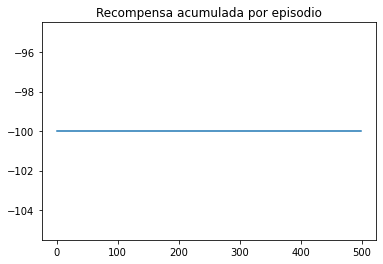

In [9]:
plot_reward_per_episode(reward_ep)

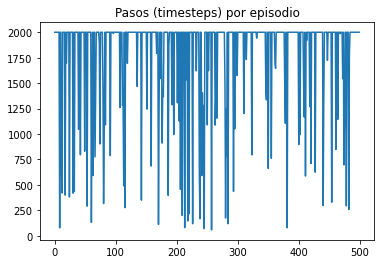

In [10]:
plot_steps_per_episode(timesteps_ep)

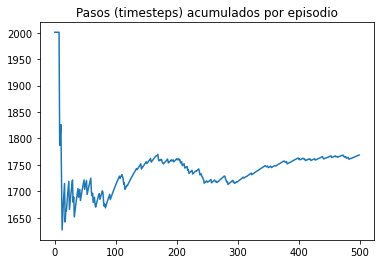

In [11]:
plot_steps_per_episode_smooth(timesteps_ep)

#### Análisis de matriz de acción-valor y política óptima

Siendo que este es un ejemplo tabular y de pocos estados / acciones, es posible realizar un análisis de convergencia desde otro punto de vista: desde el valor de la función $Q(s,a)$ para la mejor acción de cada estado, al finalizar el entrenamiento del agente, (sería la acción que el agente ejecutaría en cada estado bajo una política *greedy*). Ambos nos brindarán información sobre la convergencia alcanzada por el agente.

Tener en cuenta que este análisis se hace principalmente con fines didácticos, para entornos más complejos el mismo puede no ser factible. En tales casos, se suele hacer una *evaluación* del aprendizaje tras una cierta cantidad de *pasos de entrenamiento*, ejecutando el agente y calculando su recompensa promedio. Si esta evaluación se realiza en entornos distintos a los que fue entrenado, se estaría evaluando la **capacidad de generalización** del agente.

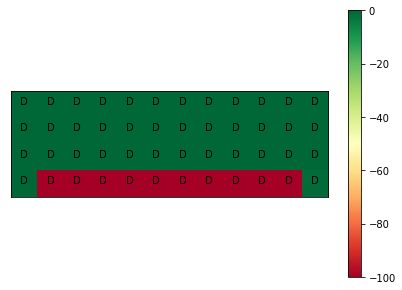


 Matriz de mejor acción-valor (en números): 

 [[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0. -100. -100. -100. -100. -100. -100. -100. -100. -100. -100.   -1.]]


In [12]:
draw_value_matrix(q)

In [13]:
env.close()

## Trabajo práctico

### Actividades

1. Resolver uno de ambos ejercicios (Opcional: resolver ambos):

    1. Resolver los [ejercicios iniciales de aprendizaje por refuerzos](https://github.com/inteligenciafrvm/inteligenciafrvm/blob/master/Clases%20pr%C3%A1cticas/9.%20Ejercicios%20iniciales%20aprendizaje%20por%20refuerzos.ipynb), mostrando el paso a paso en la resolución.

    1. Implementar política de exploración Softmax, donde la probabilidad de una acción $a$ en un estado $s$ está dada por $$\pi(a \mid s) = \frac{e^{Q(s,a)/\tau}}{\sum_{a'}e^{Q(s,a')/\tau}}$$

1. Implementar y ejecutar el algoritmo SARSA en "The Cliff".

1. Implementar y ejecutar el algoritmo Q-Learning en "The Cliff". ¿Cómo converge con respecto a SARSA? ¿A qué se debe? Comentar.

1. Ejecutando con distintos híper-parámetros, realizar una breve descripción sobre cómo afectan a la convergencia los distintos valores de $\alpha$, $\epsilon$ y $\gamma$. Si se implementó Softmax, mostrar también cómo se desempeña el agente con distintos valores de $\tau$, por ejemplo 0.1, 1, 50, 200.

1. (Opcional) Crear tu propio entorno y entrenar agentes RL en el mismo. Analizar la convergencia con distintos algoritmos (ej: PPO, DQN), resultados con distintas funciones de recompensa e híper-parámetros (la creación de entornos personalizados se define en el [notebook de la clase siguiente](https://github.com/inteligenciafrvm/inteligenciafrvm/blob/master/Clases%20pr%C3%A1cticas/11.%20Intro%20al%20aprendizaje%20por%20refuerzos%20profundo.ipynb)).

1. (Opcional) Entrena agentes en entornos más complejos con stable-baselines/rl-baselines-zoo (los entornos y algoritmos más complejos se definen en el [notebook de la clase siguiente](https://github.com/inteligenciafrvm/inteligenciafrvm/blob/master/Clases%20pr%C3%A1cticas/11.%20Intro%20al%20aprendizaje%20por%20refuerzos%20profundo.ipynb)).

### Links adicionales para profundizar

* [Libro de Sutton y Barto, libro principal de RL](http://www.incompleteideas.net/book/RLbook2018.pdf)

* [Muy buen recurso para aprender fundamentos generales de Deep RL (incluye repo de Github) (de Joshua Achiam)](https://spinningup.openai.com/en/latest/spinningup/spinningup.html)

* [Buen blog sobre RL, sus vertientes y deep learning (de Lilian Weng)](https://lilianweng.github.io/lil-log/)

Algunos frameworks:

* Excelente para arrancar con algoritmos de RL implementados para una buena variedad de entornos: [Stable-baselines3](https://github.com/DLR-RM/stable-baselines3). El repo [rl-baselines-zoo](https://github.com/DLR-RM/rl-baselines3-zoo) contiene algoritmos pre-entrenados utilizando esta librería.
* Para tareas de RL distribuidas a gran escala: [Ray RLLib](https://docs.ray.io/en/latest/rllib.html)

Fecha de entrega: **09/07/2021 23:59**.

FIN